*Write a DNN of Google Colab: 1. It must have less than 11000 parameters. 2. Achieve 99.4% validation accuracy on MNIST*

# **Import Libraries and modules**

In [ ]:
# https://keras.io/
# The following cell downloads keras for the Google Colab session
!pip install -q keras
import keras

In [ ]:
# Importing numpy library and the required modules from Keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization


from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

The cell below loads the MNIST database of handwritten digits (which comprises of a development set of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images). load_data() function of mnist class returns two tuples (x_train, y_train) and (x_test, y_test), where <br>
x_train | x_test  : uint8 array of grayscale image data with shape (60000, 28, 28) | (10000, 28, 28) respectively <br>
y_train | y_test : uint8 array of digit labels (integers in range 0-9) with shape (60000,) | (10000,) respectively <br>

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


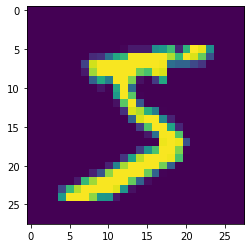

In [ ]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [ ]:
# Reshaping the images from 28x28 to 28x28x1, thus making the shape of the array contain channel information


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Grayscale are encoded as 8-bit integers, which range from 0 to 255. 
Normalizing the values of the these pixels in the image from (0,255) to (0,1) helps in obtaining easily to handle and/or easily visualizable values for loss, learning rate etc.,   

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
y_train[:10] # Prints integer label values of first 10 images

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Converting integer labels into one-hot encodings as to make the label dimension same as the number of output neurons (needed to apply cross-entropy loss as the latter works on probability distributions)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
Y_train[:10] # Prints one hot label values of first 10 images


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

--------------------------------------
Equation of the [Softmax function](https://en.wikipedia.org/wiki/Softmax_function 'Click here to learn more about the Softmax fn')
 performed on the j<sup>th</sup> output of the model defined in the cell below : 
$$ P(y = j | x) = \frac{e^{x^{T}.w_j}}{\sum_{k = 1}^{K} e^{x^{T}.w_k}} $$

where   x : input image \
&emsp; &emsp; &nbsp; w : parameters of the model (weights) \
&emsp; &emsp; &nbsp; K : number of output neurons on the network <br>

In [ ]:
model = Sequential()

 
model.add(Convolution2D(8, kernel_size = 3, strides = 1, input_shape=(28,28,1)))                       # Channel : 26x26x8 , RF : 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(12, kernel_size = 3, strides = 1))                                             # Channel : 24x24x12 , RF : 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 
   
model.add(Convolution2D(12, kernel_size = 3, strides = 1))                                             # Channel : 22x22x16 , RF : 7x7
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))                    
         
model.add(MaxPooling2D(2))                                                                             # Channel : 11x11x16 , RF : 14x14
          
model.add(Convolution2D(12, kernel_size = 3, strides = 1))                                             # Channel : 9x9x20 , RF : 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 

model.add(Convolution2D(16, kernel_size = 3, strides = 1))                                             # Channel : 7x7x24 , RF : 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 
          
model.add(Convolution2D(10, 1))                                                                        # Channel : 7x7x10 , RF : 18x18

model.add(Convolution2D(10, 7))                                                                        # Channel : 1x1x10 , RF : FULL
model.add(Flatten()) # Converts shape (1,1,10) to (10,)
model.add(Activation('softmax')) # The outputs are subjected to a softmax in order to make the latter into a sum-to-1 \
                                 #     posterior distribution, as this will be the output to cross-entropy loss. 

In [ ]:
model.summary() # Prints the summary of the Sequential model created

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 12)        0

Equation of [Cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy 'Click here to learn more about cross entropy loss') function used below while compiling : <br><br>
$$ H(p,q) = -\sum_{x \epsilon X} p(x) \text{log}  q(x) $$

where q(x) : predicted probability distribution \
&emsp; &emsp; &nbsp; p(x) : target probability distribution

----------------------------

[Adam optimizer](https://arxiv.org/abs/1412.6980 'Click here to learn more about Adam optimizer') : gradient-based optimizer used in iterative update of network weights. Default learning rate, as used here, of Keras' Adam optimizer is 0.001

In [ ]:
# compile function of model class configures the network for training. 
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# fit function of model class trains the model for a given number of epochs (here 10) and given batch size (here 20)
model.fit(X_train, Y_train, batch_size=20, epochs=20, verbose=1)

Epoch 1/20
3000/3000 [==============================] - 18s 4ms/step - loss: 0.3801 - accuracy: 0.8789
Epoch 2/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0744 - accuracy: 0.9768
Epoch 3/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 4/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 5/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 6/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0349 - accuracy: 0.9887
Epoch 7/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 8/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0317 - accuracy: 0.9894
Epoch 9/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 10/20
3000/3000 [==============================] - 10s 3ms/step - l

In [ ]:
model.fit(X_train, Y_train, batch_size=20, epochs=30, verbose=1)

Epoch 1/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 2/30
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 3/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 4/30
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 5/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 6/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 7/30
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 8/30
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 9/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 10/30
3000/3000 [==============================] - 10s 3ms/step - l

In [ ]:
# evaluate function performs a forward pass in test mode and returns loss value and accuracy for X_test images passed below
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02561553381383419, 0.9940000176429749]


In [ ]:
# predict function generates output predictions for X_test images passed below
y_pred = model.predict(X_test)

In [ ]:
print(y_pred[:9])
print(y_test[:9])

[[1.41125870e-12 7.00172906e-12 1.08572906e-09 8.73998740e-09
  1.96122873e-14 3.43291548e-15 4.32775189e-18 1.00000000e+00
  2.79179132e-12 8.68552563e-10]
 [6.17879498e-11 4.30238911e-09 1.00000000e+00 4.34577244e-12
  3.07689789e-12 1.11115931e-15 2.59705521e-11 1.82721297e-13
  1.72336659e-10 6.44821831e-15]
 [4.64226702e-08 9.99999166e-01 2.96846464e-10 1.26694460e-10
  5.32995614e-07 1.36164191e-09 3.43295739e-08 2.16041670e-07
  1.13879794e-08 4.69319161e-08]
 [9.99999881e-01 1.11761876e-11 4.99798380e-09 5.64815486e-11
  6.76489698e-11 2.19926077e-09 1.65783945e-07 7.38583934e-12
  3.50696432e-08 1.65297767e-08]
 [6.63556612e-13 3.21306133e-13 2.52160247e-15 1.60166205e-13
  9.99998331e-01 4.94965397e-15 5.22511374e-12 1.61413884e-12
  9.49508527e-12 1.63779998e-06]
 [9.61970059e-09 9.99983788e-01 1.58679825e-08 2.37352707e-11
  8.39354243e-07 1.62958952e-11 6.64126931e-09 1.51084696e-05
  5.72583403e-08 1.60182708e-07]
 [6.84484586e-22 4.59636235e-13 9.30240104e-17 1.13992794e

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
layer_dict['conv2d_6'].output

{'conv2d': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9477a768d0>, 'batch_normalization': <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9477a84e10>, 'activation': <tensorflow.python.keras.layers.core.Activation object at 0x7f9477a84d68>, 'dropout': <tensorflow.python.keras.layers.core.Dropout object at 0x7f94600b4208>, 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f94600c0c50>, 'batch_normalization_1': <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f94600c7e80>, 'activation_1': <tensorflow.python.keras.layers.core.Activation object at 0x7f9460052ba8>, 'dropout_1': <tensorflow.python.keras.layers.core.Dropout object at 0x7f9460052cf8>, 'conv2d_2': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9460063470>, 'batch_normalization_2': <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9460063ef0>, 'activation_2': <te

<KerasTensor: shape=(None, 1, 1, 10) dtype=float32 (created by layer 'conv2d_6')>